**Classifier 1:**

Accuracy: ?

Precision: ?

Recall: ?

F1-Score: ?


**Classifier 2:**

Accuracy: ?

Precision: ?

Recall: ?

F1-Score: ?

# Evaluating Classifiers

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#### Read the data

In [5]:
df = pd.read_csv("train.csv", index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Split the data into X and y

In [6]:
y = df["Survived"]
X = df.drop(columns=["Survived"])

#### Split the data into train and test set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

#### Feature Engineer

In [9]:
# For simplicity take all cols with no nans, can use more cols after engineerri
X_train_engineered = X_train[['Pclass', 'SibSp']]

#### Build a dummy classifier

In [18]:
#Strategy "most frequent" creates a model that always predicts the majority class
m_dummy = DummyClassifier(strategy="most_frequent", random_state = 10)

#### Training the model with .fit(training_data)

In [30]:
m_dummy.fit(X_train_engineered, y_train)

DummyClassifier(constant=None, random_state=10, strategy='most_frequent')

#### After we fit our model with our training data our model can predict outcome values given some input data of the same type

In [25]:
#MOdel predicts that everyone dies since majority of people died - so Dummy classifier always predicts zero - it is a control model
y_pred_dummy = m_dummy.predict(X_train_engineered)

#### Build a simple logistic regression

In [22]:
m_logistic = LogisticRegression(random_state=10)

#### Train your model with .fit(training_data)

In [28]:
m_logistic.fit(X_train_engineered, y_train)
y_pred_logistic = m_logistic.predict(X_train_engineered)

## 1) Accuracy

The first and easiest way to evaluate a classifier is the **accuracy**. It measures which ratio of the observations you classified correctly.

$\texttt{accuracy}(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^{n} 1(\hat{y}_i = y_i)$

where

$1(\hat{y}_i = y_i) = 
\begin{cases}
    1,& \text{if } \hat{y}_i = y_i\\
    0,              & \text{otherwise}
\end{cases}$

In [24]:
from sklearn.metrics import accuracy_score 

In [32]:
accuracy_dummy = accuracy_score(y_train, y_pred_dummy)
accuracy_dummy

0.6017964071856288

In [33]:
accuracy_logistic = accuracy_score(y_train, y_pred_logistic)
accuracy_logistic

0.6661676646706587

In [35]:
m_logistic.score(X_train_engineered, y_train) #Returns same thing

0.6661676646706587

Is accuracy always a good metric to evaluate your classification?<br>
* No, if you have a very imbalanced dataset, a dummy will have high accuracy but give you no information

## 2) Types of Errors and the Confusion Matrix

**False Positive:**<br>
An observation is classified as positive, although it truly is negative

**False Negatives:**<br>
An observation is classified as negative, although it truly is positive

You can plot the different types of errors in a **confusion matrix**.

In [36]:
from sklearn.metrics import plot_confusion_matrix

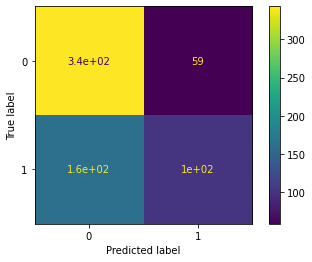

In [37]:
plot_confusion_matrix(m_logistic, X_train_engineered, y_train)

## 3) Precision

$precision = \frac{TP}{TP + FP}$

In [38]:
from sklearn.metrics import precision_score

In [41]:
precision_logistic = precision_score(y_train, y_pred_logistic)
precision_logistic

0.6335403726708074

In [42]:
precision_dummy = precision_score(y_train,y_pred_dummy)
precision_dummy

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

## 4) Recall

$recall = \frac{TP}{TP + FN}$

In [44]:
from sklearn.metrics import recall_score
recall_score(y_train, y_pred_logistic)

0.38345864661654133

In [45]:
recall_score(y_train, y_pred_dummy)

0.0

## 5) F1-Score

$F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$

In [46]:
from sklearn.metrics import f1_score

In [47]:
f1_score(y_train, y_pred_logistic)

0.477751756440281

In [48]:
f1_score(y_train, y_pred_dummy)

0.0

# We always split the data before we feature engineer it  - to ensure that there is no "leakage" of information from the test data to the training data (eg. by imputing means using all data)
* The test data should be completely "unseen" by the model before testing on it

* We must also engineer the X_test data in the same way as the training set before we can run the model on it

* in this example it would be:

`X_test_engineered = X_test[["Pclass", "SibSp"]]`